# Example: Random walk

One of the simplest random processes is the so called *random walk*. This process can arise in many ways. A standard example is the coin-flip casino game in which a gambler G starts with a fortune $a$. The croupier tosses a (possibly biased) coin. Each time heads appears, the gambler gets one euro (let us assume that the game takes place in Monte Carlo). If tails appears, the player loses one euro. 

The player's fortune $S_n$  after $n$ tosses is

\begin{equation}
S_n = a + \sum_{i=1}^n X_i,
\end{equation}

where $X_i$ is a random variable with possible outcomes $\{-1,1\}$. The probability mass function is $\{ p(X_i = -1) = p, p(X_i = 1) = 1-p \}$, where an unbiased coin would have $p=0.5$. The fortune $S_n$ can be considered a random walk stochastic process. A number of different scenarios can be considered by imposing external constraints on the gambler's fortune (such as the termination of the game when $S_n = 0$).

```{prf:example} Simple random walk
:label: example:simple-random-walk
In the following code example (again using the `StochasticProcess` class) we create a large number of such processes starting at $X_0 = 0$. Here we investigate the questions:

* What is the mean position of the random walk after $n$ steps?
* What is the average distance traveled after $n$ steps?

Can you formulate these questions as some moments of a probability distribution?
```

After   9 steps: mean = -0.021, std =   3.00
After  16 steps: mean = -0.004, std =   4.02
After  25 steps: mean = 0.017, std =   4.99
After  36 steps: mean = -0.043, std =   6.01
After  49 steps: mean = -0.015, std =   7.00
After  64 steps: mean = 0.047, std =   8.01
After  81 steps: mean = 0.112, std =   9.19
After 100 steps: mean = 0.013, std =  10.27


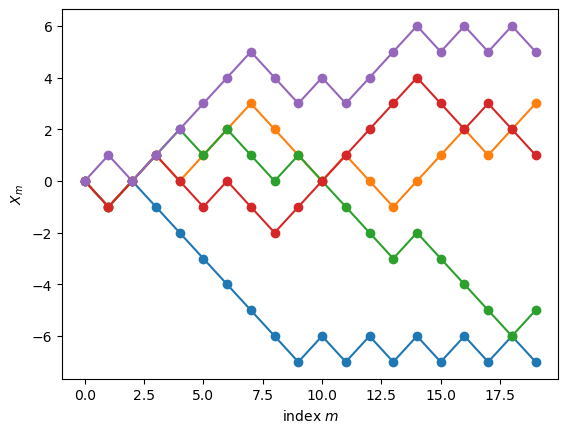

In [1]:
import numpy as np
import sys
import os
sys.path.append('../CodeLocal')
from StochasticProcess.StochasticProcess import StochasticProcess as SP

class randomwalk(SP):
    def start(self,random_state):
        return 0.

    def update(self, random_state, history):
        step = np.sign(random_state.uniform()-0.5)
        return history[-1]+step

test=randomwalk(seed=1)
test.create_multiple_processes(20,5)
test.plot_processes()

test.create_multiple_processes(101,5000)

for step in [9,16,25,36,49,64,81,100]:
    mean = test.sequence[step,:].mean()
    std = test.sequence[step,:].std()
    print(f'After {step:>3} steps: mean = {mean:5.3f}, std = {std:6.2f}')

These walks can be made more general by allowing the steps $X_n$ to have some continuous distribution on the reals, and it can be placed in a multi-dimensional space with both positions and steps in $\mathbb{R}^p$. A particularly well-known random walk process involves the motion of a particle in a fluid where it is subjected to multiple collisions. This gives a so called *Brownian motion*.